## Dutch Housing Market Price Prediction - Data Exploration

Imports

In [104]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set consistent style for all visualizations
plt.style.use('default')  # Use default style instead of seaborn
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size
plt.rcParams['axes.grid'] = True  # Add grids to plots
sns.set_theme(style="whitegrid")  # Set seaborn theme

Data Load

In [105]:
# Set random seed for reproducibility of results
np.random.seed(42)

# Load the Dutch housing dataset
df_house_pricing = pd.read_csv('../data/raw_data.csv')

# Examine initial data structure
print("Initial Dataset Overview:")
print("-----------------------")
print(f"Number of houses: {len(df_house_pricing)}")
print(f"Number of features: {len(df_house_pricing.columns)}")
print("\nFirst 5 rows of the dataset:")
display(df_house_pricing.head())
print("\nDataset Information:")
display(df_house_pricing.info())

Initial Dataset Overview:
-----------------------
Number of houses: 5555
Number of features: 16

First 5 rows of the dataset:


,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,€ 525.000,251 m²,135 m²,1972,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,€ 425.000,181 m²,109 m²,1935,Bestaande bouw,"Herenhuis, geschakelde 2-onder-1-kapwoning",Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,€ 575.000,198 m²,138 m²,1986,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,€ 259.500,231 m²,92 m²,1989,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,€ 1.050.000,423 m²,210 m²,2000,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Address                               5555 non-null   object
 1   City                                  5555 non-null   object
 2   Price                                 5555 non-null   object
 3   Lot size (m2)                         5555 non-null   object
 4   Living space size (m2)                5555 non-null   object
 5   Build year                            5471 non-null   object
 6   Build type                            5555 non-null   object
 7   House type                            5555 non-null   object
 8   Roof                                  5555 non-null   object
 9   Rooms                                 5555 non-null   object
 10  Toilet                                5555 non-null   object
 11  Floors  

None

Initial Analysis

In [106]:
# Perform initial data analysis to understand feature distributions
print("\nBasic Statistics:")
display(df_house_pricing.describe())

# Analyze missing values
print("\nMissing Values Analysis:")
missing_values = df_house_pricing.isnull().sum()
missing_percentages = (missing_values / len(df_house_pricing)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Examine data types and sample values for key features
print("\nSample values for key numeric features:")
for column in ['Price', 'Living space size (m2)', 'Lot size (m2)', 'Build year']:
    print(f"\n{column}:")
    print(df_house_pricing[column].head())


Basic Statistics:


,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
count,5555,5555,5555,5555,5555,5471,5555,5555,5555,5555,5555,5555,5555,5251,5497,5386
unique,5472,1075,545,1226,344,317,2,107,88,77,22,31,12,455,45,1266
top,Bottelroosstraat 29,Eindhoven,€ 450.000,135 m²,110 m²,1972,Bestaande bouw,"Eengezinswoning, tussenwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,C,Aan rustige weg en in woonwijk,Achtertuin en voortuin,11.035
freq,2,102,183,39,86,104,5553,1572,3137,1601,3643,2545,1545,1516,2547,21



Missing Values Analysis:


,Missing Values,Percentage
Position,304,5.472547
Estimated neighbourhood price per m2,169,3.042304
Build year,84,1.512151
Garden,58,1.044104



Sample values for key numeric features:

Price:
0      € 525.000
1      € 425.000
2      € 575.000
3      € 259.500
4    € 1.050.000
Name: Price, dtype: object

Living space size (m2):
0    135 m²
1    109 m²
2    138 m²
3     92 m²
4    210 m²
Name: Living space size (m2), dtype: object

Lot size (m2):
0    251 m²
1    181 m²
2    198 m²
3    231 m²
4    423 m²
Name: Lot size (m2), dtype: object

Build year:
0    1972
1    1935
2    1986
3    1989
4    2000
Name: Build year, dtype: object


Data Cleaning

In [107]:
def clean_price(price):
    """Convert string price values to float, handling Dutch notation.
    
    Args:
        price (str): Price in format '€ XXX.XXX'
    Returns:
        float: Cleaned price value or np.nan if invalid
    """
    if isinstance(price, str):
        price = price.replace('€', '').replace(' ', '')
        if ',' in price:
            price = price.replace('.', '').replace(',', '.')
        else:
            price = price.replace('.', '')
        try:
            return float(price)
        except:
            return np.nan
    return np.nan

def clean_size(size):
    """Convert string size values to float, removing unit notation.
    
    Args:
        size (str): Size in format 'XXX m²'
    Returns:
        float: Cleaned size value or np.nan if invalid
    """
    if isinstance(size, str):
        size = size.replace('m²', '').strip()
        try:
            return float(size)
        except:
            return np.nan
    return np.nan

# Create cleaned dataset
df_clean = df_house_pricing.copy()

# Clean numeric columns
df_clean['Price'] = df_clean['Price'].apply(clean_price)
df_clean['Living space size (m2)'] = df_clean['Living space size (m2)'].apply(clean_size)
df_clean['Lot size (m2)'] = df_clean['Lot size (m2)'].apply(clean_size)
df_clean['Build year'] = pd.to_numeric(df_clean['Build year'], errors='coerce')

# Handle missing values
df_clean = df_clean.dropna(subset=['Price'])  # Price is our target variable
df_clean['Living space size (m2)'].fillna(df_clean['Living space size (m2)'].median(), inplace=True)
df_clean['Lot size (m2)'].fillna(df_clean['Lot size (m2)'].median(), inplace=True)

print("Data Cleaning Results:")
print(f"Original dataset size: {len(df_house_pricing)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print("\nSample of cleaned numeric features:")
display(df_clean[['Price', 'Living space size (m2)', 'Lot size (m2)', 'Build year']].head())

Data Cleaning Results:
Original dataset size: 5555
Cleaned dataset size: 5542

Sample of cleaned numeric features:


/tmp/ipykernel_34520/4242561330.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Living space size (m2)'].fillna(df_clean['Living space size (m2)'].median(), inplace=True)
/tmp/ipykernel_34520/4242561330.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,Price,Living space size (m2),Lot size (m2),Build year
0,525000.0,135.0,251.0,1972.0
1,425000.0,109.0,181.0,1935.0
2,575000.0,138.0,198.0,1986.0
3,259500.0,92.0,231.0,1989.0
4,1050000.0,210.0,423.0,2000.0


Distribution Analysis

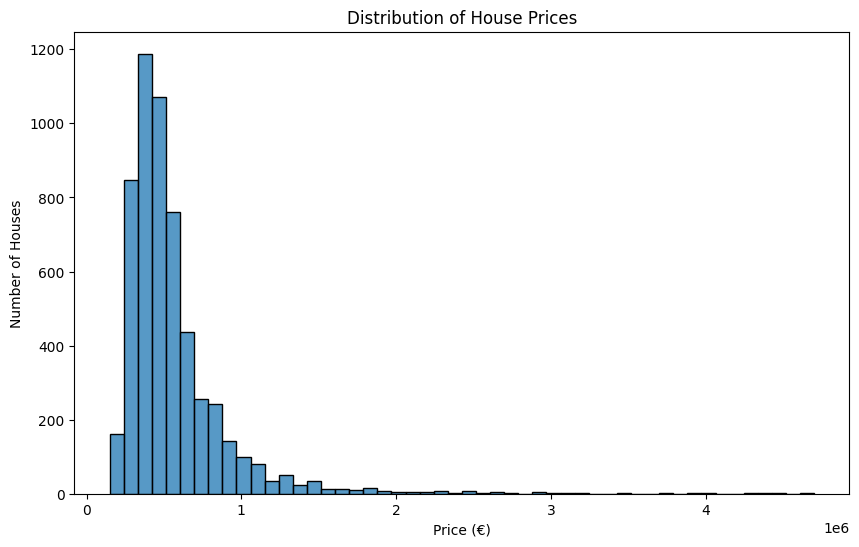

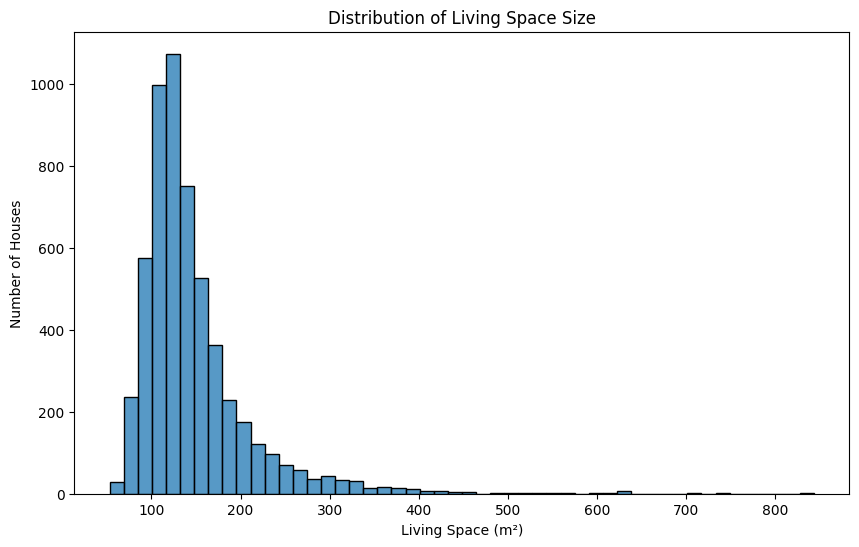

In [ ]:
# Create subplots for price and living space distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot price distribution
sns.histplot(data=df_clean, x='Price', bins=50, ax=ax1)
ax1.set_title('Distribution of House Prices')
ax1.set_xlabel('Price (€)')
ax1.set_ylabel('Number of Houses')
# Format x-axis to show prices in millions
ax1.xaxis.set_major_formatter(lambda x, p: f'€{x/1e6:.1f}M')

# Plot living space distribution
sns.histplot(data=df_clean, x='Living space size (m2)', bins=50, ax=ax2)
ax2.set_title('Distribution of Living Space Size')
ax2.set_xlabel('Living Space (m²)')
ax2.set_ylabel('Number of Houses')

plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nPrice Distribution Statistics:")
print(f"Mean Price: €{df_clean['Price'].mean():,.2f}")
print(f"Median Price: €{df_clean['Price'].median():,.2f}")
print(f"Standard Deviation: €{df_clean['Price'].std():,.2f}")

Price vs Features Analysis

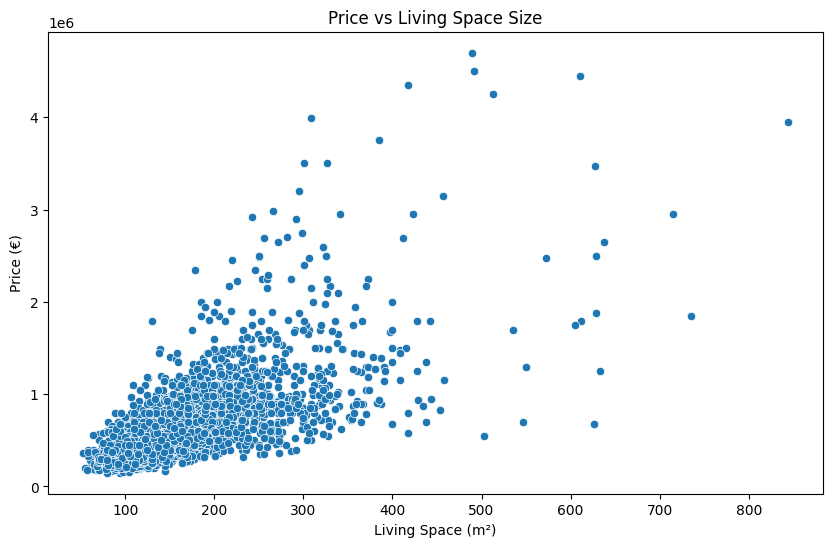

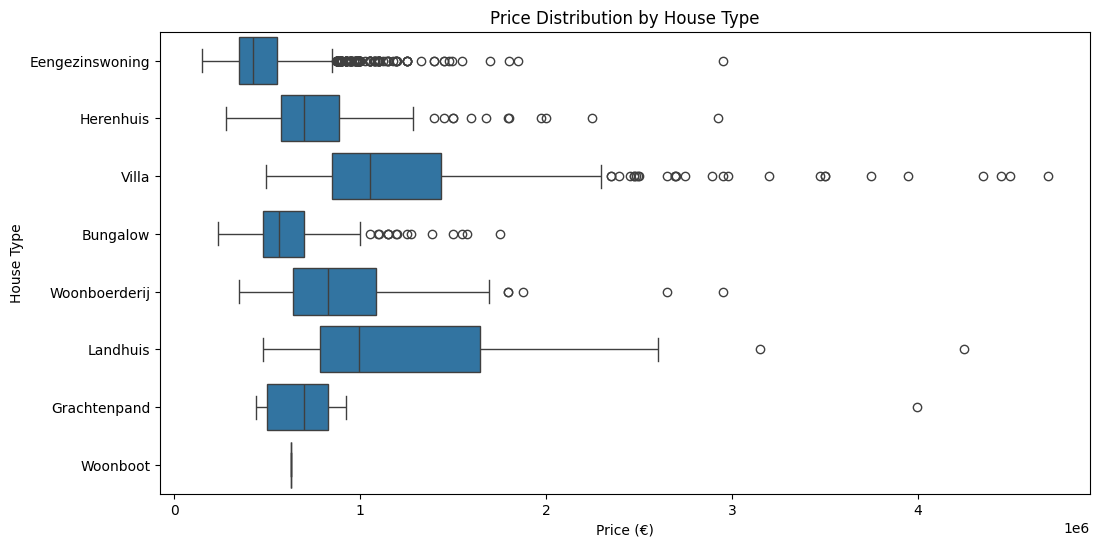

In [ ]:
# Price vs Living Space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Living space size (m2)', y='Price')
plt.title('Price vs Living Space Size')
plt.xlabel('Living Space (m²)')
plt.ylabel('Price (€)')
plt.show()

# Price by House Type

# Simplifying house types
df_clean['House type simple'] = df_clean['House type'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, y='House type simple', x='Price')
plt.title('Price Distribution by House Type')
plt.xlabel('Price (€)')
plt.ylabel('House Type')
plt.show()


Summary of Findings

In [ ]:

print("\nKey Findings:")
print("1. Number of properties:", len(df_clean))
print("2. Average price: €{:,.2f}".format(df_clean['Price'].mean()))
print("3. Price range: €{:,.2f} - €{:,.2f}".format(df_clean['Price'].min(), df_clean['Price'].max()))



Key Findings:
1. Number of properties: 5542
2. Average price: €558,299.40
3. Price range: €149,000.00 - €4,700,000.00
